In [2]:
import pandas as pd
import keras
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import numpy as np

In [3]:
#加载数据
data = pd.read_csv('datanew.csv')
data.shape

(399, 3)

In [4]:
#定义X，y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
print(X.shape)
print(type(X))
print(y.shape)

(399, 2)
<class 'pandas.core.frame.DataFrame'>
(399,)


E:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


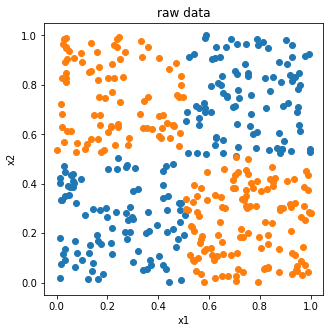

In [4]:
#数据可视化

fig1 = plt.figure(figsize=(5,5))
passed = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
# plt.legend((passed,failed),('passed','failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
fig1.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [6]:
X_train.shape

(267, 2)

In [7]:
mlp = Sequential()
mlp.add(Dense(units=20,input_dim=2,activation='sigmoid'))
mlp.add(Dense(units=1,activation='sigmoid'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [8]:
#配置模型训练参数
import tensorflow as tf
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
#模型训练
mlp.fit(X_train, y_train, epochs=3000)

In [23]:
#预测
# y_train_predict1 = mlp.predict(X_train)
# y_train_predict1 = np.where(y_train_predict1 > 0.5, 1, 0)
# classes_y = np.argmax(y_train_predict1,axis=1)
loss_and_metrics = mlp.evaluate(X_train, y_train)
print(loss_and_metrics)
# print(y_train_predict1)


9/9 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9625
[0.1108836680650711, 0.9625468254089355]


In [ ]:
import numpy as np
y_train_predict = mlp.predict(X_train)
y_train_class = np.where(y_train_predict > 0.5, 1, 0)
# print(y_train_class)
print(y_train_class)


In [ ]:
print(y_train)

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_class.flatten())
print(y_train.shape, y_train_class.flatten().shape)

(267,) (267,)


In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       146
           1       0.95      0.97      0.96       121

    accuracy                           0.96       267
   macro avg       0.96      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



In [15]:
# y_test_predict = mlp.predict(X_test)
# y_test_predict = np.where(y_test_predict>0.5, 1,0)
# loss_and_metrics_test = mlp.evaluate(X_test, y_test_predict)
# print(loss_and_metrics_test)